# FINAL PROJECT
## MLE501

## MSE23185 - Tran Trong Hieu

In [1]:
# Import sections
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
# Define transformations for data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

# Load CIFAR-10 datasets
train_dataset = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
test_dataset = datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)

# Set up data loader
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 10000, shuffle = False)

100%|██████████| 170M/170M [00:03<00:00, 48.8MB/s]


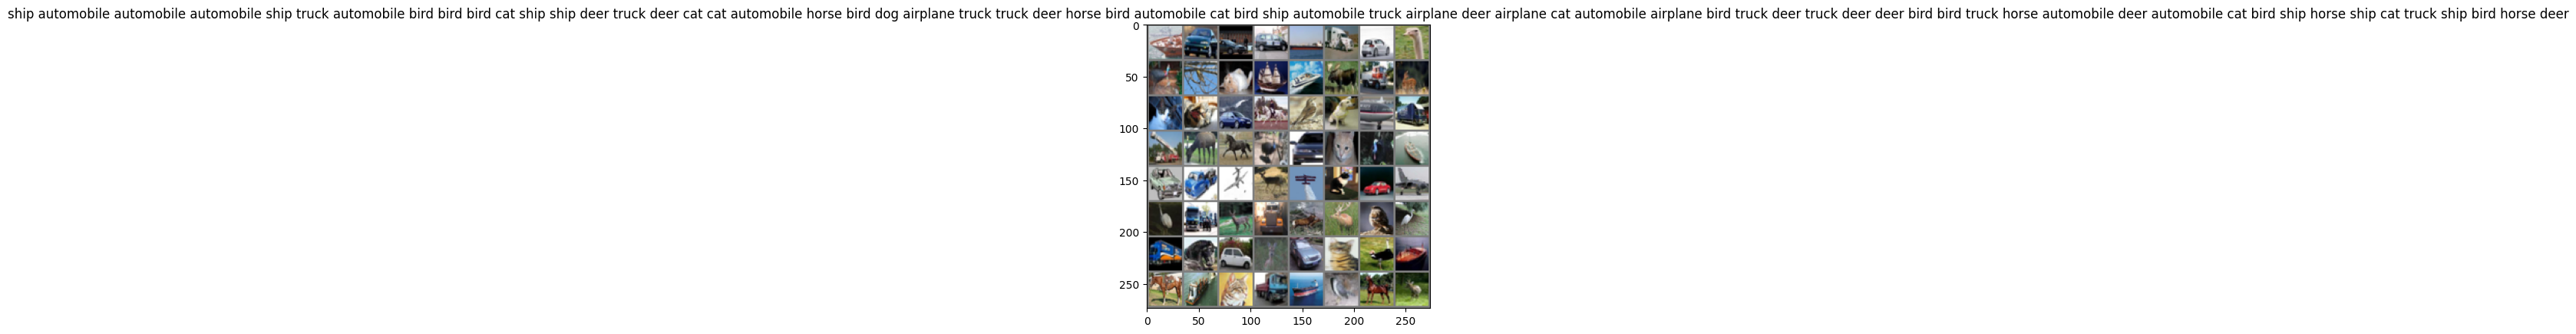

In [4]:
# Show CIFAR-10 datasets
images, labels = next(iter(train_loader))
plt.imshow(utils.make_grid(images).permute(1, 2, 0) / 2 + 0.5);
plt.title(' '.join(train_dataset.classes[label] for label in labels))
plt.show()

In [3]:
# Define a neural network
# First initialize parameters:
#   + Number of layer: 2 layers
#   + Number of neurons in hidden layer: 512 neurons
#   + Activation function: ReLU
#
class Net(nn.Module):
  def __init__(self, input_size = 32 * 32 * 3, hidden_size = 512, output_size = 10):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = x.view(-1, 32 * 32 * 3) # Flatten the input
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim = 1)

In [4]:
# Train model
def train(model, device, train_loader, criterion, optimizer, epoch):
  model.train()
  loss = 0
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print(f'Train epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}]. Loss: {loss.item():.6f}')
    loss += loss.item()
  return loss / len(train_loader)

# Test model
def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += criterion(output, target).item()
      pred = output.argmax(dim = 1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader)
  accuracy = 100. * correct / len(test_loader.dataset)
  print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)')
  return accuracy

In [5]:
# Initialize network, optimizer and loss fuction
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
loss = 0
accuracy = 0

# Traning and testing loop
for epoch in range(1, 11):
  loss = train(model, device, train_loader, criterion, optimizer, epoch)
  accuracy = test(model, device, test_loader)

# Result
print('First model:')
print('  + Number of layer: 2 layer')
print('  + Number of neurons in hidden layer: 512 neurons')
print('  + Activation function: ReLU')
print('  + Optimizer: Adam')
print('  + Loss function: CrossEntropyLoss')
print('  + Learning rate: 0.001')
print('  + Epochs: 10')
print('  + Batch size: 64')
print('Result:')
print(f'Final loss: {loss}')
print(f'Final accuracy: {accuracy:.2f}%')


Train epoch: 1 [0/50000]. Loss: 2.301395
Train epoch: 1 [6400/50000]. Loss: 1.501560
Train epoch: 1 [12800/50000]. Loss: 1.453254
Train epoch: 1 [19200/50000]. Loss: 1.619353
Train epoch: 1 [25600/50000]. Loss: 1.568479
Train epoch: 1 [32000/50000]. Loss: 1.588902
Train epoch: 1 [38400/50000]. Loss: 1.473533
Train epoch: 1 [44800/50000]. Loss: 1.568221
Test set: Average loss: 1.5174, Accuracy: 4715/10000 (47%)
Train epoch: 2 [0/50000]. Loss: 1.509901
Train epoch: 2 [6400/50000]. Loss: 1.488287
Train epoch: 2 [12800/50000]. Loss: 1.403507
Train epoch: 2 [19200/50000]. Loss: 1.400002
Train epoch: 2 [25600/50000]. Loss: 1.365379
Train epoch: 2 [32000/50000]. Loss: 1.685745
Train epoch: 2 [38400/50000]. Loss: 1.381130
Train epoch: 2 [44800/50000]. Loss: 1.494118
Test set: Average loss: 1.5192, Accuracy: 4761/10000 (48%)
Train epoch: 3 [0/50000]. Loss: 1.402160
Train epoch: 3 [6400/50000]. Loss: 1.152630
Train epoch: 3 [12800/50000]. Loss: 1.373546
Train epoch: 3 [19200/50000]. Loss: 1.2702

Thông số model 1:
+ Number of layer: 2 layer
+ Number of neurons in hidden layer: 512 neurons
+ Activation function: ReLU
+ Optimizer: Adam
+ Loss function: CrossEntropyLoss
+ Learning rate: 0.001
+ Epochs: 10
+ Batch size: 64

Kết quả:
- Final loss: 0.0018400532426312566
- Final accuracy: 51.63%

Nhận xét model 1:
- Ưu điểm:
  + Thời gian train và test nhanh (2 phút)
  + Độ tin cậy của mô hình không thấp (> 50%)

- Khuyết điểm:
  + Mô hình không có độ tin cậy cao, ở mức trung bình
  + Sự mất mát dữ liệu trung bình (loss) còn nhiều (~ 0.00184).

Chỉnh sửa và mong đợi:
- Tăng số lượng layer từ 2 lên 4

=> Mong đợi: Độ tin cậy sẽ cao hơn và sự mất mát dữ liệu sẽ ít hơn

In [5]:
# Define a neural network
# Second initialize parameters:
#   + Number of layer: 4 layers
#   + Number of neurons in hidden layer: 512 neurons
#   + Activation function: ReLU
#
class Net2(nn.Module):
    def __init__(self, input_size = 32 * 32 * 3, hidden_size = 512, output_size = 10):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)

        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)

        self.fc4 = nn.Linear(hidden_size, output_size)

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten input
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)

        x = self.fc4(x)
        return x  # dùng CrossEntropyLoss nên không cần softmax

In [9]:
# Initialize network, optimizer and loss fuction
model = Net2().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-4)
criterion = nn.CrossEntropyLoss()
# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.5)  # Giảm lr mỗi 5 epochs
loss = 0
accuracy = 0

# Traning and testing loop
for epoch in range(1, 11):
  loss = train(model, device, train_loader, criterion, optimizer, epoch)
  accuracy = test(model, device, test_loader)
  scheduler.step()  # Update learning rate

# Result
print('Second model:')
print('  + Number of layer: 4 layer')
print('  + Number of neurons in hidden layer: 512 neurons')
print('  + Activation function: ReLU')
print('  + Optimizer: Adam')
print('  + Loss function: CrossEntropyLoss')
print('  + Learning rate initialize: 0.001')
print('  + Epochs: 10')
print('  + Batch size: 64')
print('Result:')
print(f'Final loss: {loss}')
print(f'Final accuracy: {accuracy:.2f}%')

Train epoch: 1 [0/50000]. Loss: 2.408155
Train epoch: 1 [6400/50000]. Loss: 1.682856
Train epoch: 1 [12800/50000]. Loss: 1.747124
Train epoch: 1 [19200/50000]. Loss: 1.673075
Train epoch: 1 [25600/50000]. Loss: 1.592077
Train epoch: 1 [32000/50000]. Loss: 1.803750
Train epoch: 1 [38400/50000]. Loss: 1.572200
Train epoch: 1 [44800/50000]. Loss: 1.477180
Test set: Average loss: 1.4873, Accuracy: 4685/10000 (47%)
Train epoch: 2 [0/50000]. Loss: 1.677467
Train epoch: 2 [6400/50000]. Loss: 1.452981
Train epoch: 2 [12800/50000]. Loss: 1.494785
Train epoch: 2 [19200/50000]. Loss: 1.478080
Train epoch: 2 [25600/50000]. Loss: 1.620344
Train epoch: 2 [32000/50000]. Loss: 1.601217
Train epoch: 2 [38400/50000]. Loss: 1.283343
Train epoch: 2 [44800/50000]. Loss: 1.513316
Test set: Average loss: 1.3992, Accuracy: 5014/10000 (50%)
Train epoch: 3 [0/50000]. Loss: 1.400604
Train epoch: 3 [6400/50000]. Loss: 1.528578
Train epoch: 3 [12800/50000]. Loss: 1.503161
Train epoch: 3 [19200/50000]. Loss: 1.3286

Thông số model 2:
+ Number of layer: 4 layer
+ Number of neurons in hidden layer: 512 neurons
+ Activation function: ReLU
+ Optimizer: Adam
+ Loss function: CrossEntropyLoss
+ Learning rate initialize: 0.001
+ Epochs: 10
+ Batch size: 64

Kết quả:
- Final accuracy: 57.13%

Nhận xét model 2:
- Ưu điểm:
  + Thời gian train và test vẫn nhanh (2 phút)
  + Độ tin cậy của mô hình cao hơn mô hình 1 (57.13%)

- Khuyết điểm:
  + Mô hình vẫn chưa có độ tin cậy cao, vẫn ở mức trung bình
  + Sự mất mát dữ liệu trung bình (loss) vẫn còn nhiều (~ 0.0039).

Chỉnh sửa và mong đợi:
- Đổi activation function thành LeakyReLU
- Nâng epoch từ 10 lên 30

=> Mong đợi: Độ tin cậy sẽ cao hơn và sự mất mát dữ liệu sẽ ít hơn.

In [10]:
# Define a neural network
# Third initialize parameters:
#   + Number of layer: 4 layers
#   + Number of neurons in hidden layer: 512 neurons
#   + Activation function: LeakyReLU
#
class Net3(nn.Module):
    def __init__(self, input_size = 32 * 32 * 3, hidden_size = 512, output_size = 10):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)

        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)

        self.fc4 = nn.Linear(hidden_size, output_size)

        self.dropout = nn.Dropout(0.2)
        self.act = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten input

        x = self.act(self.bn1(self.fc1(x)))
        x = self.dropout(x)

        x = self.act(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        x = self.act(self.bn3(self.fc3(x)))
        x = self.dropout(x)

        x = self.fc4(x)
        return x


In [11]:
# Initialize network, optimizer and loss fuction
model = Net3().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-4)
criterion = nn.CrossEntropyLoss()
# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.5)  # Giảm lr mỗi 5 epochs
loss = 0
accuracy = 0

# Traning and testing loop
for epoch in range(1, 31):
  loss = train(model, device, train_loader, criterion, optimizer, epoch)
  accuracy = test(model, device, test_loader)
  scheduler.step()  # Update learning rate

# Result
print('Third model:')
print('  + Number of layer: 4 layer')
print('  + Number of neurons in hidden layer: 512 neurons')
print('  + Activation function: LeakyReLU')
print('  + Optimizer: Adam')
print('  + Loss function: CrossEntropyLoss')
print('  + Learning rate initialize: 0.001')
print('  + Epochs: 30')
print('  + Batch size: 64')
print('Result:')
print(f'Final loss: {loss}')
print(f'Final accuracy: {accuracy:.2f}%')

Train epoch: 1 [0/50000]. Loss: 2.421258
Train epoch: 1 [6400/50000]. Loss: 1.859070
Train epoch: 1 [12800/50000]. Loss: 1.747828
Train epoch: 1 [19200/50000]. Loss: 1.675016
Train epoch: 1 [25600/50000]. Loss: 1.550767
Train epoch: 1 [32000/50000]. Loss: 1.606490
Train epoch: 1 [38400/50000]. Loss: 1.572228
Train epoch: 1 [44800/50000]. Loss: 1.605297
Test set: Average loss: 1.4922, Accuracy: 4621/10000 (46%)
Train epoch: 2 [0/50000]. Loss: 1.486271
Train epoch: 2 [6400/50000]. Loss: 1.710287
Train epoch: 2 [12800/50000]. Loss: 1.679838
Train epoch: 2 [19200/50000]. Loss: 1.526535
Train epoch: 2 [25600/50000]. Loss: 1.364544
Train epoch: 2 [32000/50000]. Loss: 1.529232
Train epoch: 2 [38400/50000]. Loss: 1.452127
Train epoch: 2 [44800/50000]. Loss: 1.593005
Test set: Average loss: 1.4138, Accuracy: 4973/10000 (50%)
Train epoch: 3 [0/50000]. Loss: 1.470838
Train epoch: 3 [6400/50000]. Loss: 1.305396
Train epoch: 3 [12800/50000]. Loss: 1.200902
Train epoch: 3 [19200/50000]. Loss: 1.2991

Thông số model 3:
+ Number of layer: 4 layer
+ Number of neurons in hidden layer: 512 neurons
+ Activation function: LeakyReLU
+ Optimizer: Adam
+ Loss function: CrossEntropyLoss
+ Learning rate initialize: 0.001
+ Epochs: 30
+ Batch size: 64

Kết quả:
- Final accuracy: 59.73%

Nhận xét model 3:
- Ưu điểm:
  + Độ tin cậy của mô hình cao hơn mô hình 2 và gần đạt 60% (59.73%).
  + Sự mất mát dữ liệu trung bình (loss) đã thấp hơn (~ 0.001).

- Khuyết điểm:
  + Thời gian train và test lâu (8 phút)

Chỉnh sửa và mong đợi:
- Đổi optimizer từ Adam → AdamW
- Đổi activation function từ LeakyReLU → GELU
- Thêm early stop để lấy kết quả tốt nhất

=> Mong đợi: Độ tin cậy sẽ cao hơn và tránh overfitting tốt hơn. Converge ổn định hơn với dropout.

In [20]:
# Define a neural network
# Fourth initialize parameters:
#   + Number of layer: 4 layers
#   + Number of neurons in hidden layer: 512 neurons
#   + Activation function: LeakyReLU
#
class Net4(nn.Module):
    def __init__(self, input_size = 32 * 32 * 3, hidden_size = 512, output_size = 10):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)

        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)

        self.fc4 = nn.Linear(hidden_size, output_size)

        self.dropout = nn.Dropout(0.4)
        self.act = nn.GELU()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten input

        x = self.act(self.bn1(self.fc1(x)))
        x = self.dropout(x)

        x = self.act(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        x = self.act(self.bn3(self.fc3(x)))
        x = self.dropout(x)

        x = self.fc4(x)
        return x


In [21]:
# Initialize network, optimizer and loss fuction
model = Net4().to(device)
optimizer = optim.AdamW(model.parameters(), lr = 0.001, weight_decay = 1e-4)
criterion = nn.CrossEntropyLoss()
# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)  # Giảm lr mỗi 10 epochs
loss = 0
accuracy = 0

# Traning and testing loop
best_acc = 0
patience = 5
trigger_times = 0

for epoch in range(1, 31):
    loss = train(model, device, train_loader, criterion, optimizer, epoch)
    acc = test(model, device, test_loader)
    scheduler.step()

    # Check for improvement
    if acc > best_acc:
        best_acc = acc
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping!")
            break

# Result
print('Fourth model:')
print('  + Number of layer: 4 layer')
print('  + Number of neurons in hidden layer: 512 neurons')
print('  + Activation function: GELU')
print('  + Optimizer: AdamW')
print('  + Loss function: CrossEntropyLoss')
print('  + Learning rate initialize: 0.001')
print('  + Epochs: 30')
print('  + Batch size: 64')
print('Result:')
print(f'Final loss: {loss}')
print(f'Final accuracy: {best_acc :.2f}%')

Train epoch: 1 [0/50000]. Loss: 2.471845
Train epoch: 1 [6400/50000]. Loss: 1.875627
Train epoch: 1 [12800/50000]. Loss: 1.869932
Train epoch: 1 [19200/50000]. Loss: 1.522573
Train epoch: 1 [25600/50000]. Loss: 1.574197
Train epoch: 1 [32000/50000]. Loss: 1.764366
Train epoch: 1 [38400/50000]. Loss: 1.790078
Train epoch: 1 [44800/50000]. Loss: 1.692671
Test set: Average loss: 1.4890, Accuracy: 4636/10000 (46%)
Train epoch: 2 [0/50000]. Loss: 1.562652
Train epoch: 2 [6400/50000]. Loss: 1.702495
Train epoch: 2 [12800/50000]. Loss: 1.570859
Train epoch: 2 [19200/50000]. Loss: 1.345484
Train epoch: 2 [25600/50000]. Loss: 1.514311
Train epoch: 2 [32000/50000]. Loss: 1.479218
Train epoch: 2 [38400/50000]. Loss: 1.548894
Train epoch: 2 [44800/50000]. Loss: 1.483992
Test set: Average loss: 1.4397, Accuracy: 4862/10000 (49%)
Train epoch: 3 [0/50000]. Loss: 1.484228
Train epoch: 3 [6400/50000]. Loss: 1.581067
Train epoch: 3 [12800/50000]. Loss: 1.691004
Train epoch: 3 [19200/50000]. Loss: 1.7118

Thông số model 4:
+ Number of layer: 4 layer
+ Number of neurons in hidden layer: 512 neurons
+ Activation function: GELU
+ Optimizer: AdamW
+ Loss function: CrossEntropyLoss
+ Learning rate initialize: 0.001
+ Epochs: 30
+ Batch size: 64

Kết quả:
- Final accuracy: 60.28%

Nhận xét model 4:
- Ưu điểm:
  + Độ tin cậy của mô hình cao hơn mô hình 3 và hơn 60% (60.28%).

- Khuyết điểm:
  + Thời gian train và test lâu (9 phút)
  + Độ tin cậy chỉ mới hơn mức trung bình, chưa cao

=> Kết luận: Mô hình 4 đã khá tốt; qua các lần cải tiến từ việc thêm layer, đổi activation function, optimizer, linh hoạt giảm learning rate và chủ động early stop đã cho ra kết quả mong đợi là tăng độ tin cậy từ 51% lên 60%% giúp cho mô hình đạt hiệu suất cao. Tuy nhiên 60% vẫn chỉ trên mức trung bình và mô hình cẩn cải tiến thêm hoặc dùng phương pháp khác.